# CIFAR-10

###  CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects..
### We will use CIFAR-10 dataset to build a CNN image classifier. CIFAR-10 dataset has 10 different class or labels with 6000 images per class

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck


### It has 50,000 training data and 10,000 testing image data. Image size in CIFAR-10 is 32 x 32 x 3. It comes with Keras library.


![alt text](cifar.png "Title")


![alt text](cifar10.png "Title")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [18]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Visualise the data

Text(0.5, 1.0, 'Ground Truth : [3]')

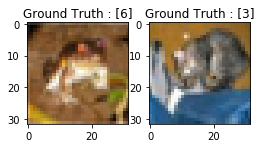

In [15]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))



Text(0.5, 1.0, 'Ground Truth : [6]')

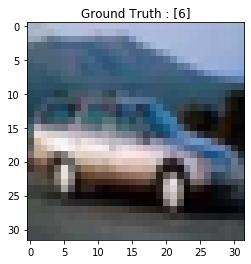

In [22]:
plt.imshow(train_images[4,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))


In [23]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [24]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [25]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

## Scaling Normalization

Normalize the data between 0–1 by dividing train data and test data with 255 then convert all labels into one-hot vector with to_catagorical() function.

In [26]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [27]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Build the Model

In [28]:
model = tf.keras.Sequential()
    # The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

## Compile the Model

In [29]:
batch_size = 256
epochs = 50
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

After compiling our model, we will train our model by fit() method, then evaluate it.

In [30]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 182s 929ms/step - loss: 2.0448 - accuracy: 0.2483 - val_loss: 1.8145 - val_accuracy: 0.3425
Epoch 2/50
196/196 [==============================] - 188s 960ms/step - loss: 1.7096 - accuracy: 0.3791 - val_loss: 1.5242 - val_accuracy: 0.4526
Epoch 3/50
196/196 [==============================] - 186s 947ms/step - loss: 1.5222 - accuracy: 0.4485 - val_loss: 1.5310 - val_accuracy: 0.4484
Epoch 4/50
196/196 [==============================] - 172s 879ms/step - loss: 1.3899 - accuracy: 0.5016 - val_loss: 1.4476 - val_accuracy: 0.4733
Epoch 5/50
196/196 [==============================] - 193s 982ms/step - loss: 1.2799 - accuracy: 0.5417 - val_loss: 1.2944 - val_accuracy: 0.5431
Epoch 6/50
196/196 [==============================] - 168s 856ms/step - loss: 1.1906 - accuracy: 0.5727 - val_loss: 1.1299 - val_accuracy: 0.5986
Epoch 7/50
196/196 [==============================] - 170s 867ms/step - loss: 1.1107 - accuracy: 0.6056 - val_loss: 1.0079 -

[0.6170138716697693, 0.8055999875068665]

## Predictions

We will predict the probabilities of all the images in our test set using the model.predict_proba(), then we will get the name of the classes with maximum probability using argmax function and get the corresponding probabilities using the np.max().

In [38]:
y_pred_test = model.predict_proba(test_data)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [39]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

We will then output a random set of images in the form of 2 rows and 8 column with their corresponding predicted class name, probability and the true value of that image.

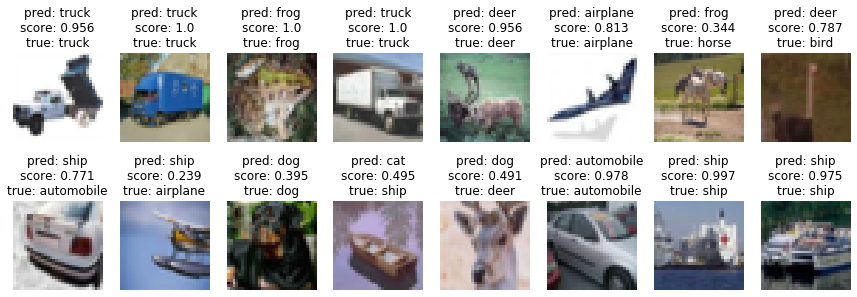

In [44]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_data[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[test_labels[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()